# Simple ML introducion

Written by:
- Manuel Szewc (School of Physics, University of Cincinnati)
- Philip Ilten (School of Physics, University of Cincinnati)
$\renewcommand{\gtrsim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{>}{\sim}$\hspace{1mm}}}\renewcommand{\lessim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{<}{\sim}$\hspace{1mm}}}\renewcommand{\as}{\alpha_{\mathrm{s}}}\renewcommand{\aem}{\alpha_{\mathrm{em}}}\renewcommand{\kT}{k_{\perp}}\renewcommand{\pT}{p_{\perp}}\renewcommand{\pTs}{p^2_{\perp}}\renewcommand{\pTe}{\p_{\perp\mrm{evol}}}\renewcommand{\pTse}{\p^2_{\perp\mrm{evol}}}\renewcommand{\pTmin}{p_{\perp\mathrm{min}}}\renewcommand{\pTsmim}{p^2_{\perp\mathrm{min}}}\renewcommand{\pTmax}{p_{\perp\mathrm{max}}}\renewcommand{\pTsmax}{p^2_{\perp\mathrm{max}}}\renewcommand{\pTL}{p_{\perp\mathrm{L}}}\renewcommand{\pTD}{p_{\perp\mathrm{D}}}\renewcommand{\pTA}{p_{\perp\mathrm{A}}}\renewcommand{\pTsL}{p^2_{\perp\mathrm{L}}}\renewcommand{\pTsD}{p^2_{\perp\mathrm{D}}}\renewcommand{\pTsA}{p^2_{\perp\mathrm{A}}}\renewcommand{\pTo}{p_{\perp 0}}\renewcommand{\shat}{\hat{s}}\renewcommand{\a}{{\mathrm a}}\renewcommand{\b}{{\mathrm b}}\renewcommand{\c}{{\mathrm c}}\renewcommand{\d}{{\mathrm d}}\renewcommand{\e}{{\mathrm e}}\renewcommand{\f}{{\mathrm f}}\renewcommand{\g}{{\mathrm g}}\renewcommand{\hrm}{{\mathrm h}}\renewcommand{\lrm}{{\mathrm l}}\renewcommand{\n}{{\mathrm n}}\renewcommand{\p}{{\mathrm p}}\renewcommand{\q}{{\mathrm q}}\renewcommand{\s}{{\mathrm s}}\renewcommand{\t}{{\mathrm t}}\renewcommand{\u}{{\mathrm u}}\renewcommand{\A}{{\mathrm A}}\renewcommand{\B}{{\mathrm B}}\renewcommand{\D}{{\mathrm D}}\renewcommand{\F}{{\mathrm F}}\renewcommand{\H}{{\mathrm H}}\renewcommand{\J}{{\mathrm J}}\renewcommand{\K}{{\mathrm K}}\renewcommand{\L}{{\mathrm L}}\renewcommand{\Q}{{\mathrm Q}}\renewcommand{\R}{{\mathrm R}}\renewcommand{\T}{{\mathrm T}}\renewcommand{\W}{{\mathrm W}}\renewcommand{\Z}{{\mathrm Z}}\renewcommand{\bbar}{\overline{\mathrm b}}\renewcommand{\cbar}{\overline{\mathrm c}}\renewcommand{\dbar}{\overline{\mathrm d}}\renewcommand{\fbar}{\overline{\mathrm f}}\renewcommand{\pbar}{\overline{\mathrm p}}\renewcommand{\qbar}{\overline{\mathrm q}}\renewcommand{\rbar}{\overline{\mathrm{r}}}\renewcommand{\sbar}{\overline{\mathrm s}}\renewcommand{\tbar}{\overline{\mathrm t}}\renewcommand{\ubar}{\overline{\mathrm u}}\renewcommand{\Bbar}{\overline{\mathrm B}}\renewcommand{\Fbar}{\overline{\mathrm F}}\renewcommand{\Qbar}{\overline{\mathrm Q}}\renewcommand{\tms}{{t_{\mathrm{\tiny MS}}}}\renewcommand{\Oas}[1]{{\mathcal{O}\left(\as^{#1}\right)}}$

## Introduction

This notebook wants to implement simple Machine Learning algorithms

In [1]:
import os

# To generate data and handle arrays
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Clustering

In [4]:
from sklearn.datasets import make_blobs

gt_center = np.array([[3.0, 3.0],[-3.0, -3.0],[-3.0,3.0],[3.0,-3.0]])
X, t = make_blobs(1000, n_features=2, centers=gt_center, cluster_std=1.0, random_state=1234, )

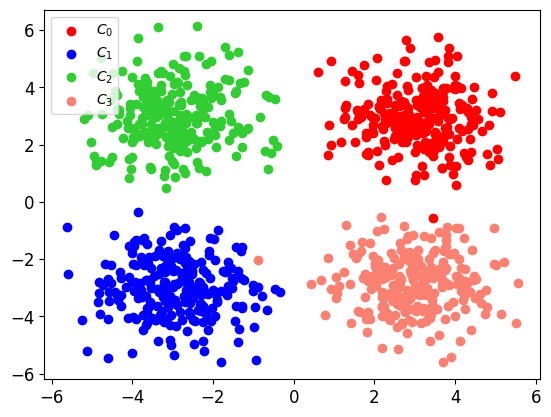

In [5]:
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')

plt.legend(loc='upper left')

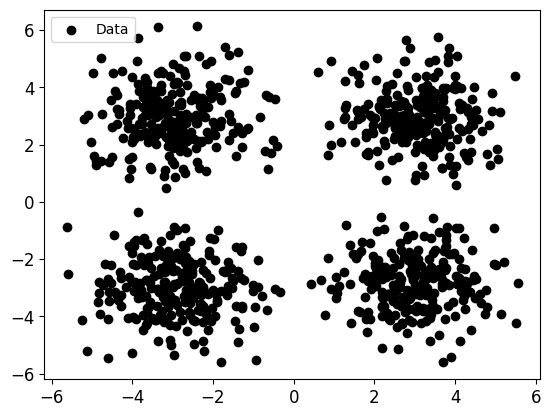

In [6]:

plt.scatter(X[:,0],X[:,1],c='black', label='Data')

plt.legend(loc='upper left')

In [60]:
class KMeansClustering():

    def __init__(self,nclasses=2,ndim=2,scale_init=5,mean_init=0,seed=42):
        np.random.seed(seed)
        self.nclasses = nclasses
        self.ndim = ndim
        self.means = mean_init+scale_init*np.random.randn(nclasses,ndim)

    def fit(self,X,nepochs=10,min_change=0.01):
        for nepoch in range(nepochs):
            indexes = self.class_assigner(X)
            for nclass in range(self.nclasses):
                self.means[nclass] = np.sum(X[indexes==nclass],0)/np.sum(indexes==nclass)
        return self

    def class_assigner(self,X):
        distances = np.sum((X[:,np.newaxis]-self.means[np.newaxis])**2,2) 
        indexes=np.argmin(distances,1)
        return indexes

In [67]:
clusterer = KMeansClustering(nclasses=4,seed=42)
clusterer.fit(X)
labels = clusterer.class_assigner(X)

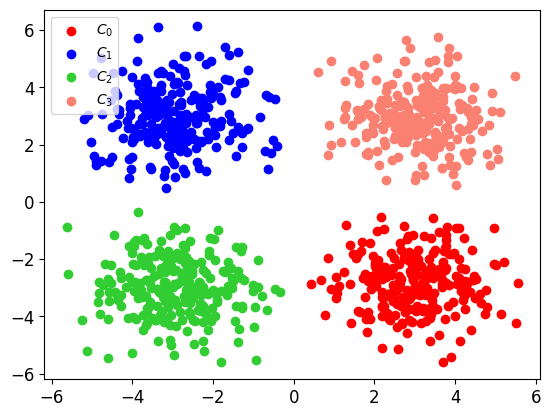

In [68]:
plt.scatter(X[labels==0,0],X[labels==0,1],c='red', label='$C_{0}$')
plt.scatter(X[labels==1,0],X[labels==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[labels==2,0],X[labels==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[labels==3,0],X[labels==3,1],c='salmon', label='$C_{3}$')

plt.legend(loc='upper left')

#### Jet Clustering

## Density Estimation

Gaussian mixture

In [78]:
from sklearn.datasets import make_blobs

gt_center = np.array([[3.0, 3.0],[-3.0, -3.0],[-3.0,3.0],[3.0,-3.0]])
X, t = make_blobs(1000, n_features=2, centers=gt_center, cluster_std=1.0, random_state=1234, )

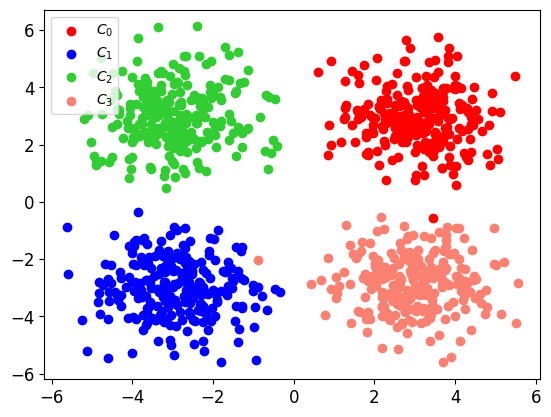

In [79]:
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')

plt.legend(loc='upper left')

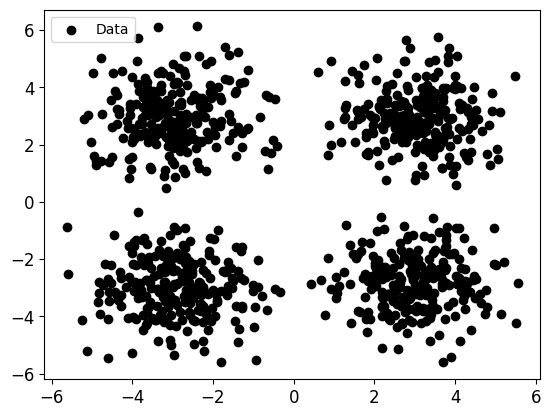

In [80]:

plt.scatter(X[:,0],X[:,1],c='black', label='Data')

plt.legend(loc='upper left')

In [267]:
class GaussianMixtureModel():

    def __init__(self,nclasses=2,ndim=2,scale_init=5,mean_init=0,epsilon=1e-10,seed=42):
        np.random.seed(seed)
        self.nclasses = nclasses
        self.ndim = ndim
        self.w = np.ones(self.nclasses) / self.nclasses
        self.means = mean_init+scale_init*np.random.randn(nclasses,ndim)
        self.covs = np.array([np.eye(self.ndim) for _ in range(self.nclasses)])
        self.precision_matrix = np.array([np.eye(self.ndim) for _ in range(self.nclasses)])
        self.epsilon = epsilon*np.array([np.eye(self.ndim) for _ in range(self.nclasses)])

    def fit(self,X,nepochs=10,min_change=0.01):
        log_likelihood = self.log_likelihood(X)
        for nepoch in range(nepochs):
            probas = self.E_step(X)
            self.M_step(X,probas)
            self.precision_matrix = np.linalg.inv(self.covs+self.epsilon)
            log_likelihood_new = self.log_likelihood(X)
            # if log_likelihood_new < (1.0+min_change)*log_likelihood:
            #     break
            log_likelihood = log_likelihood_new
        # print(nepoch)
        return self

    def predict_proba(self,X):
        ### get likelihoods
        likelihood = self.gaussian_likelihood(X)
        ### reweight using weights
        weighted_likelihood=np.einsum('nk, k -> nk',likelihood,self.w)
        ### normalize 
        probas = np.einsum('nk,n -> nk',weighted_likelihood,1/np.sum(weighted_likelihood,1))
        return probas

    def predict(self,X):
        ### get likelihoods
        likelihood = self.gaussian_likelihood(X)
        ### reweight using weights
        weighted_likelihood=np.einsum('nk, k -> nk',likelihood,self.w)
        ### normalize 
        probas = np.einsum('nk,n -> nk',weighted_likelihood,1/np.sum(weighted_likelihood,1))
        return np.argmin(probas,1)
        
    def gaussian_likelihood(self,X):
        ### distance vector is NxKxD
        distance_vector = X[:,np.newaxis]-self.means[np.newaxis]
        ### weighted distance for denominator, now it's NxK
        weighted_distance = np.einsum('nki, kij, nkj -> nk',distance_vector,self.precision_matrix,distance_vector)
        ### likelihood per event per class
        likelihood = np.einsum('k,nk -> nk',(np.power(2*np.pi,-self.ndim/2))*(1.0/np.sqrt(np.linalg.det(self.covs))),np.exp(-0.5*weighted_distance))
        return likelihood
        
    def E_step(self,X):
        probas = self.predict_proba(X)
        return probas

    def M_step(self,X,probas):
        Nk = np.sum(probas,0)
        self.w = Nk/len(X)
        self.means = np.einsum('nk, nd, k -> kd',probas,X,1/Nk)
        distance_vector = X[:,np.newaxis]-self.means[np.newaxis]
        self.covs = np.einsum('nk, nki, nkj, k -> kij',probas,distance_vector,distance_vector,1/Nk)
        return self

    def log_likelihood(self,X):
        ### get likelihoods
        likelihood = self.gaussian_likelihood(X)
        ### reweight using weights
        weighted_likelihood=np.einsum('nk, k -> nk',likelihood,self.w)
        return np.sum(np.log(np.sum(weighted_likelihood,1)))

In [268]:
gmm = GaussianMixtureModel(nclasses=4,ndim=2,seed=156)

In [269]:
gmm.means.shape,gmm.covs.shape

((4, 2), (4, 2, 2))

In [271]:
gmm.predict(X)

array([0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 3, 0,
       0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2,
       0, 2, 2, 1, 3, 1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 3, 0, 2, 0, 0, 0, 1, 0, 2, 0,
       2, 2, 2, 2, 3, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [272]:
gmm.log_likelihood(X)

-9851.561006598913

In [273]:
gmm.fit(X,nepochs=100,min_change=1)

In [274]:
gmm.w

array([0.02681068, 0.50072355, 0.22337231, 0.24909345])

In [275]:
gmm.means

array([[ 2.44231802, -3.11573824],
       [-2.95089112, -0.00655364],
       [ 3.03815915, -2.79447954],
       [ 3.05809789,  2.9717204 ]])

In [276]:
gmm.covs[0]

array([[ 0.37627211, -0.61557352],
       [-0.61557352,  1.12362035]])

In [277]:
gmm.precision_matrix[0]

array([[25.62053848, 14.03616895],
       [14.03616895,  8.57967189]])

In [278]:
probas = gmm.predict_proba(X)
labels = np.argmin(probas,1)

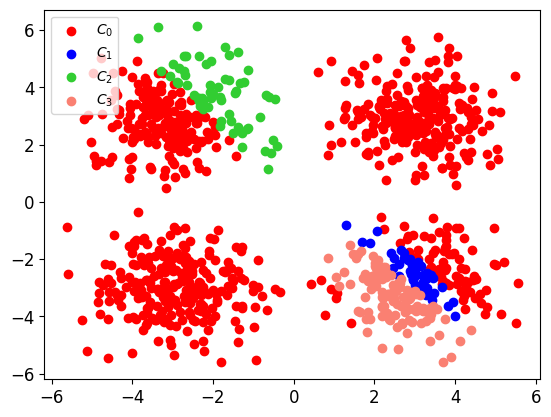

In [279]:
plt.scatter(X[labels==0,0],X[labels==0,1],c='red', label='$C_{0}$')
plt.scatter(X[labels==1,0],X[labels==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[labels==2,0],X[labels==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[labels==3,0],X[labels==3,1],c='salmon', label='$C_{3}$')

plt.legend(loc='upper left')

Seed dependence

In [280]:
nmodels = 100
log_likelihoods = np.zeros(nmodels)
seeds = np.zeros(nmodels)
nmodel = 0
nmodel_accepted = 0
while nmodel_accepted < nmodels:
    gmm = GaussianMixtureModel(nclasses=4,ndim=2,seed=nmodel)
    gmm.fit(X,nepochs=100)
    log_likelihood = gmm.log_likelihood(X)
    if np.isnan(log_likelihood) == False:
        log_likelihoods[nmodel_accepted]=log_likelihood
        seeds[nmodel_accepted]=nmodel
        nmodel_accepted+=1
        nmodel+=1
    else:
        nmodel+=1

/tmp/ipykernel_140356/3200863874.py:50: RuntimeWarning: divide by zero encountered in divide
  likelihood = np.einsum('k,nk -> nk',(np.power(2*np.pi,-self.ndim/2))*(1.0/np.sqrt(np.linalg.det(self.covs))),np.exp(-0.5*weighted_distance))
/tmp/ipykernel_140356/3200863874.py:50: RuntimeWarning: invalid value encountered in sqrt
  likelihood = np.einsum('k,nk -> nk',(np.power(2*np.pi,-self.ndim/2))*(1.0/np.sqrt(np.linalg.det(self.covs))),np.exp(-0.5*weighted_distance))


In [281]:
np.isnan(log_likelihoods[0])

False

(array([ 1.,  0.,  0., 15., 16.,  0.,  0.,  0.,  0., 68.]),
 array([-4546.99792225, -4509.30393484, -4471.60994744, -4433.91596003,
        -4396.22197263, -4358.52798523, -4320.83399782, -4283.14001042,
        -4245.44602302, -4207.75203561, -4170.05804821]),
 <BarContainer object of 10 artists>)

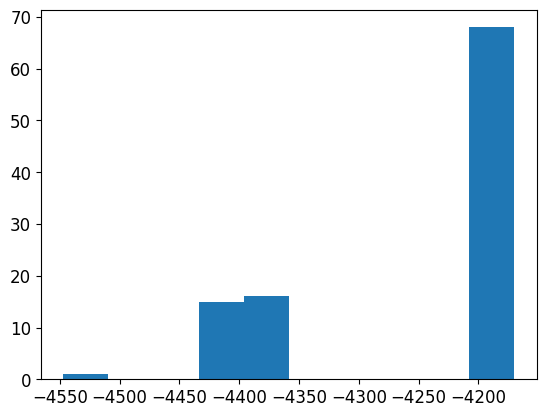

In [282]:
plt.hist(log_likelihoods)

In [283]:
np.argmax(log_likelihoods)

0

In [284]:
best_model = GaussianMixtureModel(nclasses=4,ndim=2,seed=int(seeds[np.argmax(log_likelihoods)]))
best_model.fit(X,nepochs=100)

In [285]:
best_model.w, best_model.means, best_model.covs

(array([0.24993551, 0.2501922 , 0.25085067, 0.24902161]),
 array([[ 2.97754719, -2.82836043],
        [-2.97164716,  3.00987586],
        [-2.92661263, -3.01743046],
        [ 3.05886396,  2.97160878]]),
 array([[[ 0.90949568,  0.00462763],
         [ 0.00462763,  0.9081273 ]],
 
        [[ 0.94941871,  0.04034079],
         [ 0.04034079,  1.11561005]],
 
        [[ 0.9997179 , -0.05429475],
         [-0.05429475,  0.95783466]],
 
        [[ 0.84129669, -0.04968167],
         [-0.04968167,  0.95664935]]]))

In [286]:
probas = best_model.predict_proba(X)
labels = np.argmin(probas,1)

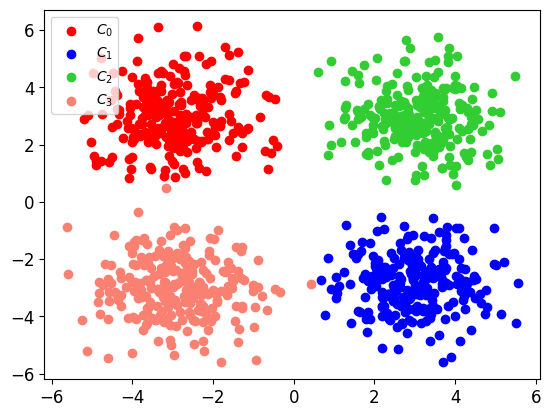

In [287]:
plt.scatter(X[labels==0,0],X[labels==0,1],c='red', label='$C_{0}$')
plt.scatter(X[labels==1,0],X[labels==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[labels==2,0],X[labels==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[labels==3,0],X[labels==3,1],c='salmon', label='$C_{3}$')

plt.legend(loc='upper left')

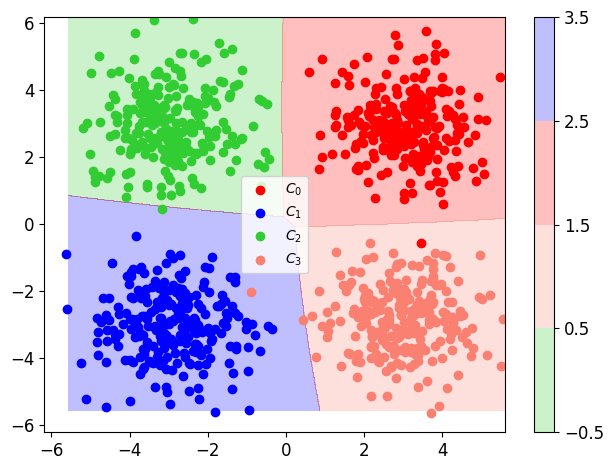

In [300]:
x1vals = np.linspace(0.99*np.min(X[:,0]),1.01*np.max(X[:,0]),1000)
x2vals = np.linspace(0.99*np.min(X[:,1]),1.01*np.max(X[:,1]),1000)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = best_model.predict(Xvals).reshape(X1.shape)
plt.contourf(X1,X2,Z,colors=['limegreen','salmon','red','blue'],levels=[-0.5,0.5,1.5,2.5,3.5],alpha=0.25)
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.tight_layout()
plt.legend(loc='center')